<a href="https://colab.research.google.com/github/Astro2000-ai/brish/blob/main/Lab2_Bricia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
sns.set(color_codes=True)

#load the dataframe
df = pd.read_csv("humidity_Temperature.csv")

# **Part 1: Basic Statistics**

# Measures of Central Tendencies

---



**Mean**

In [ ]:
df.humidity = sorted(df.humidity)
df.temperature = sorted(df.temperature)
sorteddata = df[["humidity", "temperature"]]
sorteddata.head()

,humidity,temperature
0,8.0,34.00
1,11.0,34.47
2,11.0,35.00
3,11.0,35.00
4,11.0,35.00


In [ ]:
np.mean(sorteddata)

humidity       75.995508
temperature    51.052207
dtype: float64

**Median**

In [ ]:
np.median(sorteddata)

56.0

**Get the mean and the median of humidity and temperature dataset**

In [ ]:
## with outliers
humidity_Temp = sorted([sorteddata])

print(f"mean: {np.mean(humidity_Temp)} \n median: {np.median(humidity_Temp)}")

mean: 63.52385731526771 
 median: 56.0


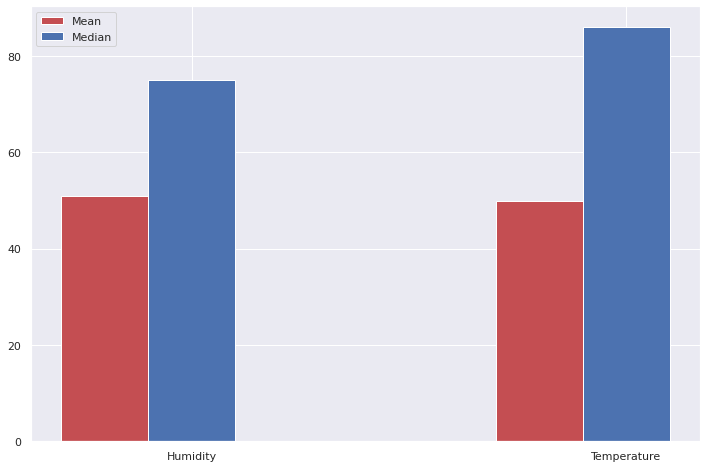

In [ ]:
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8))

temp_data = [] 
hum_data = []
tempMean = np.floor(np.mean(df.temperature))
tempMedian = np.median(df.temperature)
humMean = np.floor(np.mean(df.humidity))
humMedian = np.median(df.humidity)
hum_data.append(humMean)
hum_data.append(humMedian)
temp_data.append(tempMean)
temp_data.append(tempMedian)

br1 = np.arange(len(temp_data))
br2 = [x + barWidth for x in br1]
plt.bar(br1, temp_data, color = 'r', width = barWidth, label = "Mean")
plt.bar(br2, hum_data, color = 'b', width = barWidth, label = "Median")

plt.xticks([r + barWidth for r in range(2)],
        ['Humidity', 'Temperature'])

plt.legend()
plt.show()

**Mode**

In [ ]:
stats.mode(df.humidity)

ModeResult(mode=array([93.]), count=array([2556]))

In [ ]:
stats.mode(df.temperature)

ModeResult(mode=array([45.]), count=array([3737]))

# Measures of Dispersion

**Variance**

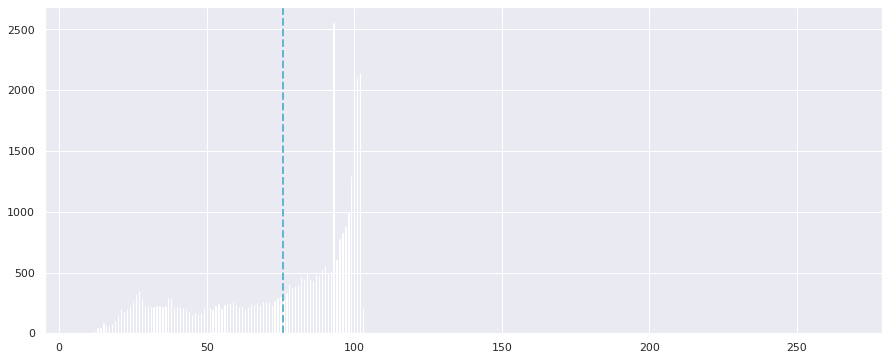

75.0


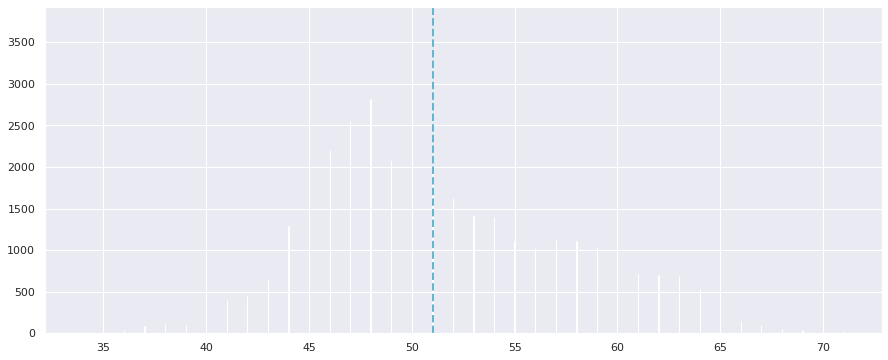

51.0


In [ ]:
def plot_hist(arr):
  plt.figure(figsize=(15,6))
  plt.hist(arr, int(len(arr)*0.1))
  plt.axvline(arr.mean(), color='c', linestyle='dashed', linewidth=2)
  plt.show()

plot_hist(df.humidity)
print(np.floor(np.mean(df.humidity)))
plot_hist(df.temperature)
print(np.floor(np.mean(df.temperature)))

**Standard Deviation**

In [ ]:
print(np.std(df.humidity))
print(np.std(df.temperature))

26.56023839066726
6.188154535326642


In [ ]:
np.var(df.humidity)

705.4462633690748

In [ ]:
np.var(df.temperature)

38.29325655308368

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


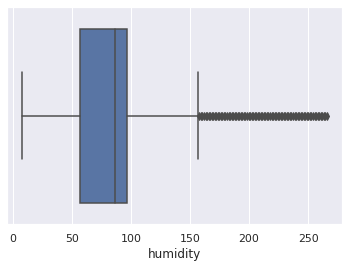

In [ ]:
sns.boxplot(df.humidity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


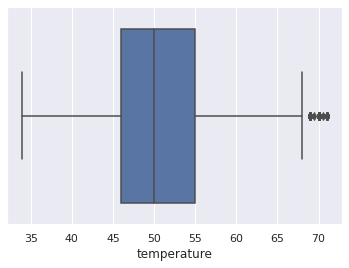

In [ ]:
sns.boxplot(df.temperature)

# **Part 2: Scaling and Sampling**

In [ ]:
df.describe()

,sample,humidity,temperature
count,34198.000000,35093.000000,35093.000000
mean,16786.608983,75.995508,51.052207
std,9751.957697,26.560617,6.188243
min,1.000000,8.000000,34.000000
25%,8230.250000,57.000000,46.000000
50%,16779.500000,86.000000,50.000000
75%,25328.750000,97.000000,55.000000
max,33133.000000,265.800000,71.000000


In [ ]:
df.head()

,sample,date,timestamp,humidity,temperature
0,1.0,9/30/16,23:55:18,8.0,34.00
1,2.0,9/30/16,23:50:23,11.0,34.47
2,3.0,9/30/16,23:45:24,11.0,35.00
3,4.0,9/30/16,23:40:21,11.0,35.00
4,5.0,9/30/16,23:35:22,11.0,35.00


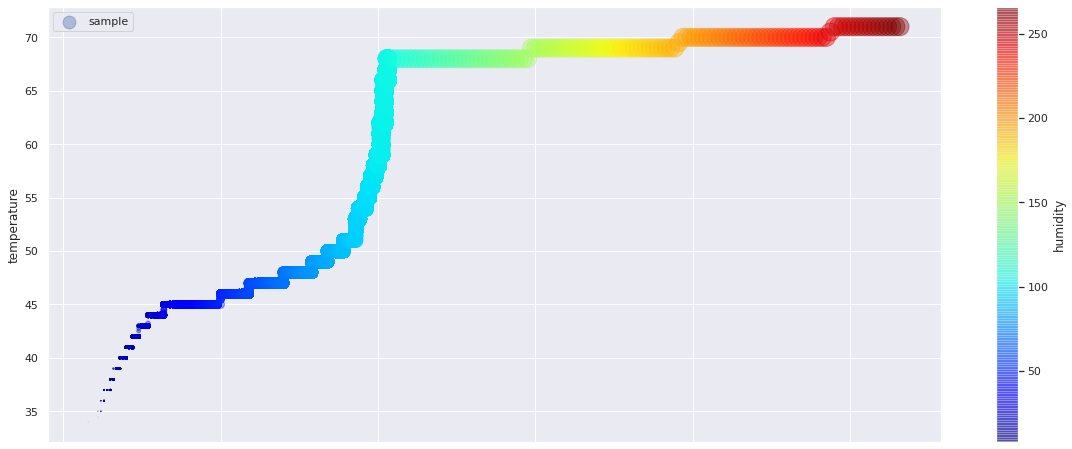

In [ ]:
df.plot(kind="scatter", x = "humidity", y= 'temperature', alpha= .4, 
            s=df["sample"]/100, label="sample", figsize=(20,8),
            c="humidity", cmap=plt.get_cmap("jet"), colorbar=True,
            )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


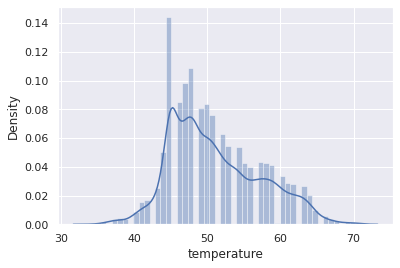

In [ ]:
sns.distplot(df['temperature'],50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


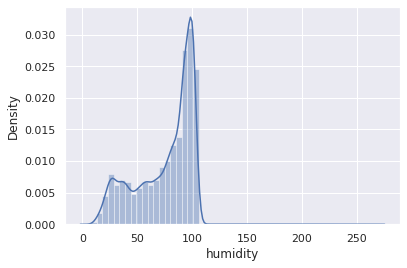

In [ ]:
sns.distplot(df['humidity'],50)
plt.show()

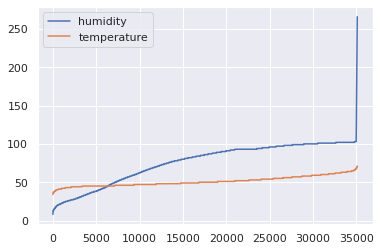

In [ ]:
x = df[['humidity', 'temperature']]
x.plot()

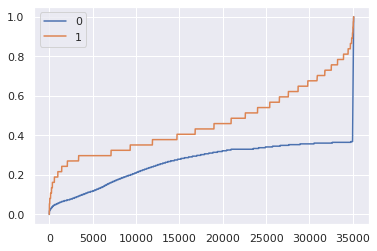

In [ ]:
from sklearn.preprocessing import MinMaxScaler
## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler()
norm = norm_scaler.fit(x)
## Transform the target dataset
x_norm = norm.transform(x)
pd.DataFrame(x_norm).plot()

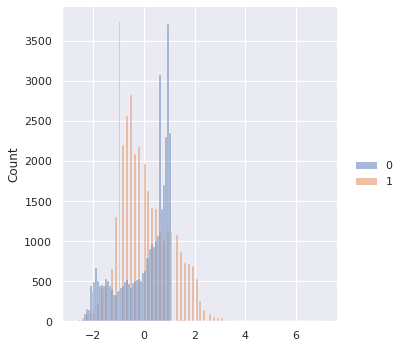

In [ ]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(x)
## Transform the target dataset
x_standard = standard.transform(x)
sns.displot(x_standard)